In [ ]:
# IPL DATA ANALYSIS

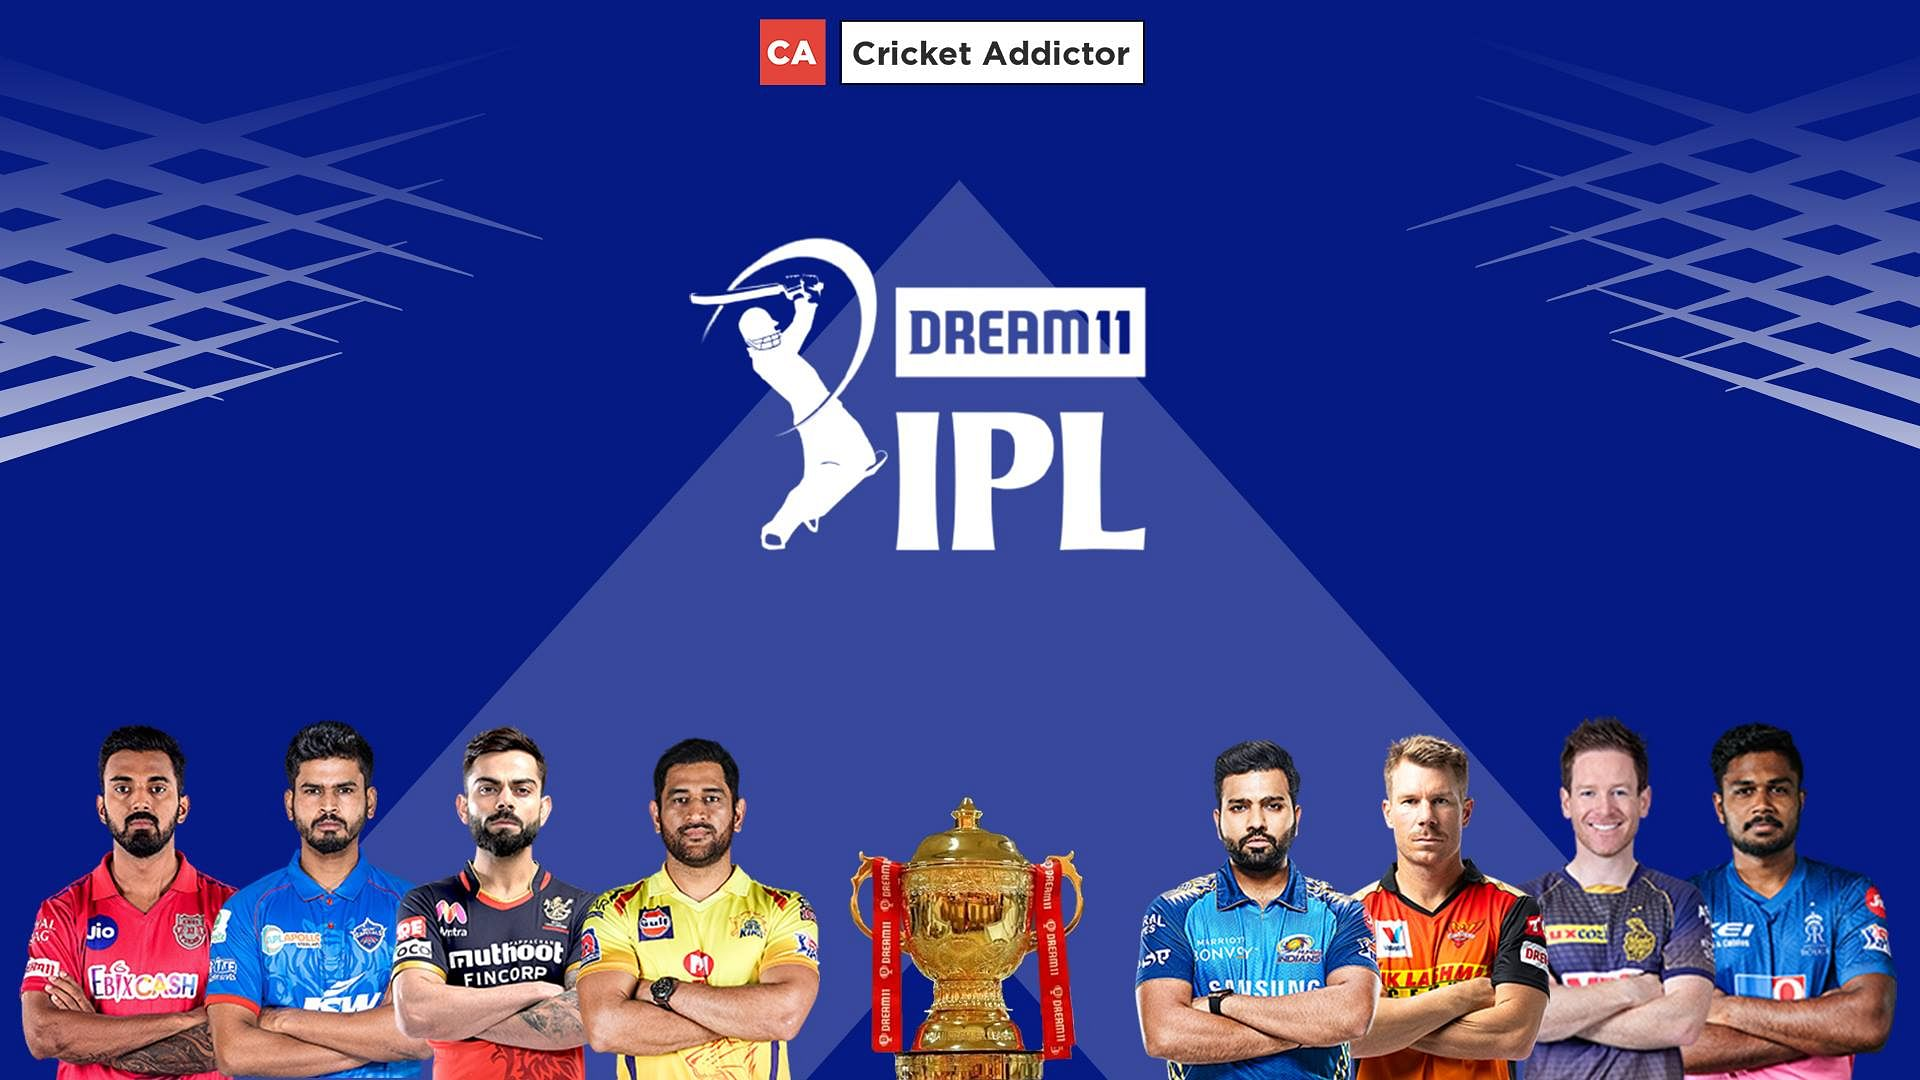

In [2]:
# DATA Analysis
import pandas as pd
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# Importing Datasets

In [4]:
#Importing
import warnings
warnings.simplefilter(action='ignore',category=Warning)
pd.set_option('display.max_columns',None)
matches=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")

In [5]:
# Shape of data
print(matches.shape,deliveries.shape)

(756, 18) (179078, 21)


In [5]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# Cleaning data

In [6]:
matches[matches['city'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


# Cleaning Data

In [7]:
matches.loc[matches['city'].isna(),'city']='Dubai'

In [8]:
matches[matches['winner'].isna()]
matches.loc[matches['winner'].isna(),'winnner']='No winner'
matches.loc[matches['player_of_match'].isna(),'player_of_match']='No player_of_match'

In [9]:
matches.loc[matches['umpire1'].isna() | (matches['id']==5), ['umpire1','umpire2']]=['S Ravi', 'VK Sharma']
matches.loc[matches['umpire1'].isna() | (matches['id']==11413), ['umpire1','umpire2']]=['Bruce Oxenford', 'Sundaram Ravi']

In [10]:
matches.drop('umpire3',axis=1,inplace=True)

In [11]:
matches.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)
deliveries.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [12]:
matches.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',inplace=True)
deliveries.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',inplace=True)

# EDA

# Total number of matches in season

[Text(0.5, 1.0, 'Total number of matches')]

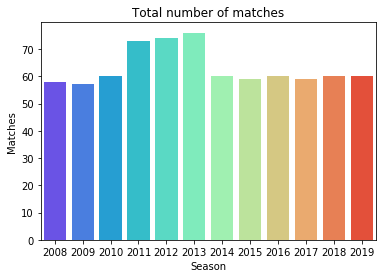

In [20]:
total_matches_season=matches["season"].value_counts().reset_index()
total_matches_season.columns=["Season","Matches"]
#total_matches_season
sns.barplot(x="Season",y="Matches",data=total_matches_season,palette='rainbow').set(title="Total number of matches")

In [21]:
matches_played=pd.concat([matches["team1"],matches["team2"]],axis=0)
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=["Team","Total Matches Played"]
matches_played["winner"]=matches["winner"].value_counts().reset_index()["winner"]
matches_played["Winnig_percentage"]=matches_played["winner"]/matches_played["Total Matches Played"]*100
matches_played

,Team,Total Matches Played,winner,Winnig_percentage
0,Mumbai Indians,187,109,58.288770
1,Royal Challengers Bangalore,180,100,55.555556
2,Kolkata Knight Riders,178,92,51.685393
3,Delhi Daredevils,177,84,47.457627
4,Kings XI Punjab,176,82,46.590909
5,Chennai Super Kings,164,77,46.951220
6,Rajasthan Royals,147,75,51.020408
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,15,32.608696


# Team with no. of matches played, matches winner, percentage of winning matches

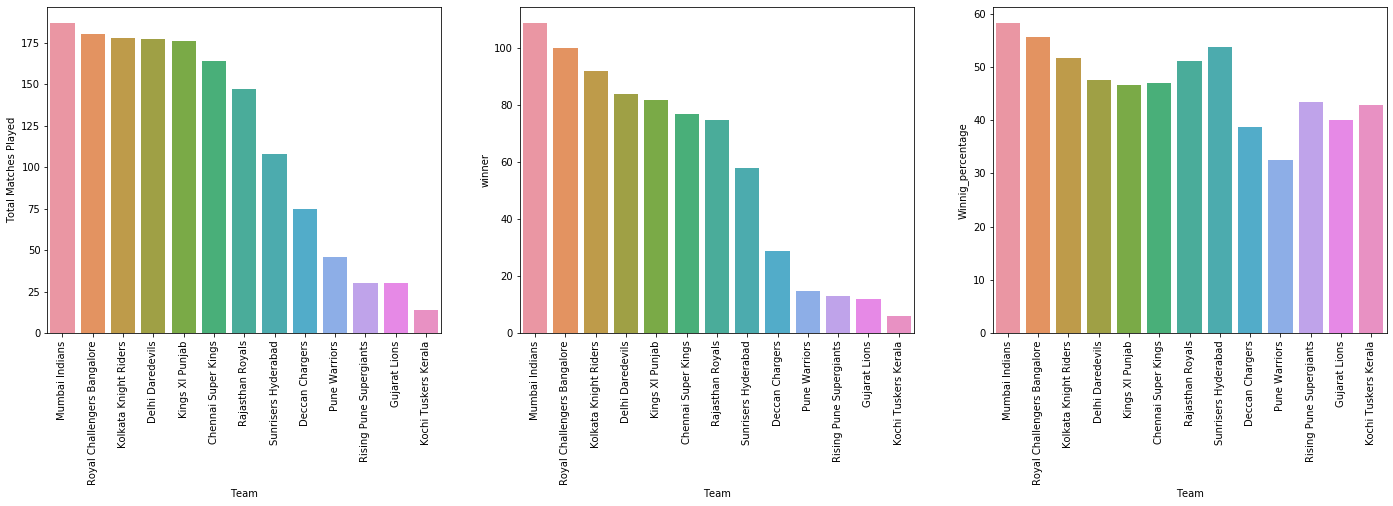

In [22]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(24,6))
sns.barplot(x="Team",y="Total Matches Played",data=matches_played,ax=axes[0]).set_xticklabels(
matches_played["Team"],rotation=90);
sns.barplot(x="Team",y="winner",data=matches_played,ax=axes[1]).set_xticklabels(
matches_played["Team"],rotation=90);
sns.barplot(x="Team",y="Winnig_percentage",data=matches_played,ax=axes[2]).set_xticklabels(
matches_played["Team"],rotation=90);

# City with No. of matches played

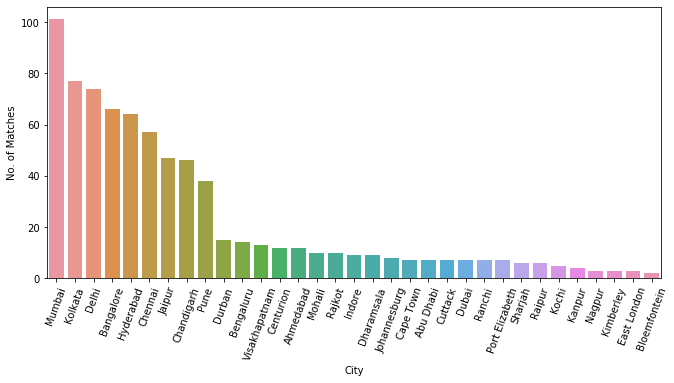

In [26]:
fig,axes=plt.subplots(figsize=(11,5))
matches_city=matches["city"].value_counts().reset_index().sort_values(by='city',ascending=False)
matches_city.columns=["City","No. of Matches"]
sns.barplot(x="City",y="No. of Matches",data=matches_city).set_xticklabels(matches_city["City"],rotation=70);

# Matches Played w.r.t Stadium

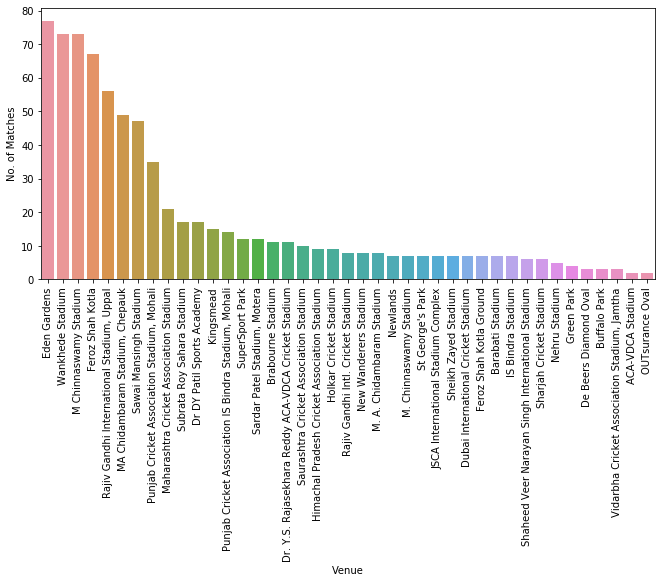

In [29]:
fig,axes=plt.subplots(figsize=(11,5))
matches_venues=matches["venue"].value_counts().reset_index().sort_values(by='venue',ascending=False)
matches_venues.columns=["Venue","No. of Matches"]
sns.barplot(x="Venue",y="No. of Matches",data=matches_venues).set_xticklabels(
matches_venues["Venue"],rotation=90);

# Merging two datasets 

# Total and average runs per season

In [21]:
runs=matches.merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
total_runs_season=runs.groupby(['season'])['total_runs'].sum().reset_index()
matches_season=matches.groupby(['season']).count()["id"].reset_index()
matches_season.rename(columns={'id':'matches'},inplace=True)
matches_season["total_runs"]=total_runs_season["total_runs"]
matches_season["average_runs_per_match"]=matches_season["total_runs"]/matches_season['matches']
matches_season

,season,matches,total_runs,average_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


# Total and average runs per season(Bar plot)

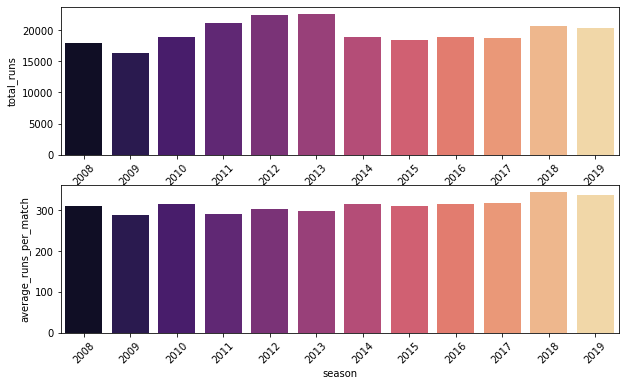

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,6))
sns.barplot(x='season',y='total_runs',data=matches_season,ax=axes[0],palette='magma').set_xticklabels(
matches_season["season"],rotation=45) 
sns.barplot(x='season',y='average_runs_per_match',data=matches_season,ax=axes[1],palette='magma').set_xticklabels(
matches_season["season"],rotation=45);